## 1.0 Importing Libraries and Data 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datasist as ds
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from colorama import Fore, Style

In [2]:
# Data Importing
df = pd.read_csv('C:\\Users\\lynxn\\Google Drive\\My Drive\\Classroom\\Data Analytics Cohort 4\\Capstone Project\\dataset_risk_analytics (2).csv')

## 2.0 Interogate and understanding imported data

In [3]:
#Using datasist info, describe, shape to get an understanding of Data imported

In [4]:
ds.structdata.describe(df)

First five data points


,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0




Random five data points


,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
1625,2474,2250.0,3,20.0,100.0,200.0,C,42,27,"0,0,0,0,0,0",1
4945,5490,8250.0,4,59.0,690.0,1840.0,B,60,5,"0,0,0,0,0,0",1
66,1061,15750.0,5,33.0,4500.0,4800.0,A,60,31,"0,0,0,0,0,0",1
1190,2081,9000.0,5,54.0,700.0,900.0,A,60,10,"0,0,0,0,0,0",1
4178,4794,5250.0,5,9.0,750.0,750.0,A,60,55,"0,0,0,0,0,0",0




Last five data points


,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1
5782,6249,2250.0,6,6.0,1500.0,1500.0,C,36,35,"0,0,0,0,0,0",0




Shape of  data set: (5783, 11)


Size of  data set: 63613


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
loan_id,int64
monthly_income,float64
origination_score_band,int64
TOB_months,float64
closing_principal_balance,float64
original_loan_amount,float64
product,object
original_loan_term,int64
remaining_loan_term,int64
delq_history,object




Numerical Features in Data set
['loan_id', 'monthly_income', 'origination_score_band', 'TOB_months', 'closing_principal_balance', 'original_loan_amount', 'original_loan_term', 'remaining_loan_term', 'target']


Categorical Features in Data set


['product', 'delq_history']



Statistical Description of Columns


,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,target
count,5783.000000,5406.000000,5783.000000,5406.000000,5406.000000,5406.000000,5783.000000,5783.000000,5783.000000
mean,3625.042711,14314.372919,3.904029,28.385683,5714.391417,6630.701073,62.023517,39.618364,0.302092
std,1516.292643,13799.514988,1.490877,16.357494,7837.483534,8491.265603,23.774170,25.004423,0.459205
min,1000.000000,750.000000,1.000000,6.000000,100.000000,100.000000,12.000000,0.000000,0.000000
25%,2310.500000,6000.000000,3.000000,17.000000,1380.000000,1800.000000,60.000000,23.000000,0.000000
50%,3623.000000,9750.000000,4.000000,24.000000,3000.000000,3750.000000,60.000000,40.000000,0.000000
75%,4934.500000,17250.000000,5.000000,38.000000,6800.000000,8100.000000,60.000000,51.000000,1.000000
max,6249.000000,99750.000000,8.000000,83.000000,88200.000000,90000.000000,192.000000,177.000000,1.000000




Description of Categorical Features


,count,unique,top,freq
product,5783,4,A,2942
delq_history,5406,55,"0,0,0,0,0,0",3838




Unique class Count of Categorical features


,Feature,Unique Count
0,product,4
1,delq_history,56




Missing Values in Data


,features,missing_counts,missing_percent
0,loan_id,0,0.0
1,monthly_income,377,6.5
2,origination_score_band,0,0.0
3,TOB_months,377,6.5
4,closing_principal_balance,377,6.5
5,original_loan_amount,377,6.5
6,product,0,0.0
7,original_loan_term,0,0.0
8,remaining_loan_term,0,0.0
9,delq_history,377,6.5


In [5]:
df.describe()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,target
count,5783.000000,5406.000000,5783.000000,5406.000000,5406.000000,5406.000000,5783.000000,5783.000000,5783.000000
mean,3625.042711,14314.372919,3.904029,28.385683,5714.391417,6630.701073,62.023517,39.618364,0.302092
std,1516.292643,13799.514988,1.490877,16.357494,7837.483534,8491.265603,23.774170,25.004423,0.459205
min,1000.000000,750.000000,1.000000,6.000000,100.000000,100.000000,12.000000,0.000000,0.000000
25%,2310.500000,6000.000000,3.000000,17.000000,1380.000000,1800.000000,60.000000,23.000000,0.000000
50%,3623.000000,9750.000000,4.000000,24.000000,3000.000000,3750.000000,60.000000,40.000000,0.000000
75%,4934.500000,17250.000000,5.000000,38.000000,6800.000000,8100.000000,60.000000,51.000000,1.000000
max,6249.000000,99750.000000,8.000000,83.000000,88200.000000,90000.000000,192.000000,177.000000,1.000000


In [6]:
df.info

<bound method DataFrame.info of       loan_id  monthly_income  origination_score_band  TOB_months  \
0        1000          6000.0                       5        83.0   
1        1001         39000.0                       5        82.0   
2        1002         18000.0                       5        78.0   
3        1003         23250.0                       3        76.0   
4        1004         12000.0                       3        74.0   
...       ...             ...                     ...         ...   
5778     6245          8250.0                       4         6.0   
5779     6246          2250.0                       5         6.0   
5780     6247          3750.0                       5         6.0   
5781     6248          9750.0                       7         6.0   
5782     6249          2250.0                       6         6.0   

      closing_principal_balance  original_loan_amount product  \
0                         300.0                1800.0       B   
1        

In [7]:
df.shape

(5783, 11)

In [8]:
df.keys()

Index(['loan_id', 'monthly_income', 'origination_score_band', 'TOB_months',
       'closing_principal_balance', 'original_loan_amount', 'product',
       'original_loan_term', 'remaining_loan_term', 'delq_history', 'target'],
      dtype='object')

## 3.0 Cleaning Data

In [9]:
# Checking for outliers, null vales, duplicates, and drop unnecessary columns

In [10]:
#Checking for rows containing null or missing values
df.isnull().sum()

loan_id                        0
monthly_income               377
origination_score_band         0
TOB_months                   377
closing_principal_balance    377
original_loan_amount         377
product                        0
original_loan_term             0
remaining_loan_term            0
delq_history                 377
target                         0
dtype: int64

In [11]:
# Removing rows containing null or missing values
df = df.dropna()

In [12]:
# Checking to verify that there are no null or missing values
df.isnull().sum()

loan_id                      0
monthly_income               0
origination_score_band       0
TOB_months                   0
closing_principal_balance    0
original_loan_amount         0
product                      0
original_loan_term           0
remaining_loan_term          0
delq_history                 0
target                       0
dtype: int64

In [13]:
#Checking for the number of of duplicated rows
df.duplicated().sum()

533

In [14]:
# Removing rows containing duplicates values
df = df.drop_duplicates(keep='first')

In [15]:
# Checking to verify that there are no duplicated values
df.duplicated().sum()

0

In [16]:
# Checking to verify that there all rows have unique values
df.duplicated().nunique()

1

In [17]:
# Dropping columns not needed
df = df.drop(columns=['loan_id','delq_history'])

In [18]:
df

,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,target
0,6000.0,5,83.0,300.0,1800.0,B,24,5,0
1,39000.0,5,82.0,7200.0,11700.0,B,60,42,0
2,18000.0,5,78.0,2700.0,5400.0,B,60,46,0
3,23250.0,3,76.0,3900.0,6900.0,B,60,48,1
4,12000.0,3,74.0,2100.0,3600.0,B,60,50,0
...,...,...,...,...,...,...,...,...,...
5778,8250.0,4,6.0,6000.0,6000.0,A,36,35,0
5779,2250.0,5,6.0,1500.0,1500.0,C,12,11,0
5780,3750.0,5,6.0,3000.0,3000.0,D,60,65,0
5781,9750.0,7,6.0,7500.0,7500.0,D,60,65,1


In [19]:
# Deriving columns that will assist our features in prediction

In [20]:
# The debt-to-income ratio is a measure of a borrower's financial stability.
# It is calculated by dividing the monthly debt by their monthly income.

df['debt_to_income'] = (df['closing_principal_balance']/df['monthly_income']).round(2)

In [21]:
# The interest rate on the loan may affect the risk of default.
# The higher the interest rate, the more expensive the loan.
# Therefore, increasing the risk of default.

# Create a lambda function for calculating the interest
calculate_interest_rate = lambda row: (row['closing_principal_balance'] / row['original_loan_amount']) ** (1/row['original_loan_term']) - 1

In [22]:
# Use the apply() function to apply the lambda function to each row of the DataFrame
df['interest_rate'] = df.apply(calculate_interest_rate, axis=1)

In [23]:
df['interest_rate'] = ((df['interest_rate']*100)*-1).round(2)

In [24]:
df.dtypes

monthly_income               float64
origination_score_band         int64
TOB_months                   float64
closing_principal_balance    float64
original_loan_amount         float64
product                       object
original_loan_term             int64
remaining_loan_term            int64
target                         int64
debt_to_income               float64
interest_rate                float64
dtype: object

In [25]:
#Convert object data types with an encoder to enable inclusion a independent features

In [26]:
# from sklearn.preprocessing import LabelEncoder
# Create a label encoder for each categorical feature
# le1 = LabelEncoder()

# Encode the categorical features
# df['product'] = le1.fit_transform(df['product'])

# Label encoder did not predict the best outcome, so I coverted with ordinal 

In [27]:
# Create an ordinal encoder for each categorical feature
oe1 = OrdinalEncoder()

# Encode the categorical features
df['product'] = oe1.fit_transform(df[['product']])


In [28]:
#Save the derived columns into our dataframe
df = df

In [29]:
df.dtypes

monthly_income               float64
origination_score_band         int64
TOB_months                   float64
closing_principal_balance    float64
original_loan_amount         float64
product                      float64
original_loan_term             int64
remaining_loan_term            int64
target                         int64
debt_to_income               float64
interest_rate                float64
dtype: object

In [30]:
df.head(15)

,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,target,debt_to_income,interest_rate
0,6000.0,5,83.0,300.0,1800.0,1.0,24,5,0,0.05,7.19
1,39000.0,5,82.0,7200.0,11700.0,1.0,60,42,0,0.18,0.81
2,18000.0,5,78.0,2700.0,5400.0,1.0,60,46,0,0.15,1.15
3,23250.0,3,76.0,3900.0,6900.0,1.0,60,48,1,0.17,0.95
4,12000.0,3,74.0,2100.0,3600.0,1.0,60,50,0,0.18,0.89
5,60000.0,5,72.0,13500.0,18000.0,1.0,60,52,0,0.22,0.48
6,15750.0,3,71.0,2700.0,4800.0,1.0,59,52,0,0.17,0.97
7,51000.0,3,70.0,12600.0,15300.0,1.0,60,54,1,0.25,0.32
8,6000.0,4,68.0,600.0,1800.0,1.0,23,19,1,0.10,4.66
9,26250.0,5,68.0,4800.0,7800.0,1.0,60,56,1,0.18,0.81


In [31]:
df.describe()

,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,target,debt_to_income,interest_rate
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000
mean,14414.836856,3.898215,28.397086,5764.565976,6685.485327,0.759286,62.114098,39.628360,0.299610,0.390780,0.449795
std,13946.848379,1.492559,16.419510,7958.981479,8612.775117,0.955135,23.823088,25.101886,0.458134,0.262396,0.869720
min,750.000000,1.000000,6.000000,100.000000,100.000000,0.000000,12.000000,0.000000,0.000000,0.010000,-0.000000
25%,6000.000000,3.000000,16.000000,1380.000000,1800.000000,0.000000,60.000000,23.000000,0.000000,0.170000,0.000000
50%,9750.000000,4.000000,24.000000,3220.000000,3800.000000,0.000000,60.000000,40.000000,0.000000,0.290000,0.180000
75%,18000.000000,5.000000,38.000000,6800.000000,8100.000000,1.000000,60.000000,51.000000,1.000000,0.600000,0.420000
max,99750.000000,8.000000,83.000000,88200.000000,90000.000000,3.000000,192.000000,177.000000,1.000000,1.200000,7.350000


In [32]:
#We are therefore, left with 4873 rows and 12 columns
df.shape

(4873, 11)

## 4.0 Visualising data

In [33]:
#Summary of Data
df.corr()

,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,target,debt_to_income,interest_rate
monthly_income,1.000000,0.025765,0.157018,0.750378,0.754162,0.089107,0.034940,-0.016172,-0.049122,0.035608,-0.124201
origination_score_band,0.025765,1.000000,-0.002932,0.018781,0.017163,-0.073918,-0.001301,-0.015659,0.104942,-0.002150,0.017032
TOB_months,0.157018,-0.002932,1.000000,0.019371,0.116784,-0.052708,0.020986,-0.442488,0.042655,-0.181777,0.307703
closing_principal_balance,0.750378,0.018781,0.019371,1.000000,0.981470,0.047965,0.045553,0.042369,-0.038322,0.492609,-0.183086
original_loan_amount,0.754162,0.017163,0.116784,0.981470,1.000000,0.066453,0.024656,-0.012028,-0.038077,0.467632,-0.094327
product,0.089107,-0.073918,-0.052708,0.047965,0.066453,1.000000,-0.242616,-0.097474,0.086516,-0.048144,0.132485
original_loan_term,0.034940,-0.001301,0.020986,0.045553,0.024656,-0.242616,1.000000,0.793162,-0.004111,0.062439,-0.320660
remaining_loan_term,-0.016172,-0.015659,-0.442488,0.042369,-0.012028,-0.097474,0.793162,1.000000,0.001385,0.145103,-0.391759
target,-0.049122,0.104942,0.042655,-0.038322,-0.038077,0.086516,-0.004111,0.001385,1.000000,0.007157,-0.037662
debt_to_income,0.035608,-0.002150,-0.181777,0.492609,0.467632,-0.048144,0.062439,0.145103,0.007157,1.000000,-0.287080


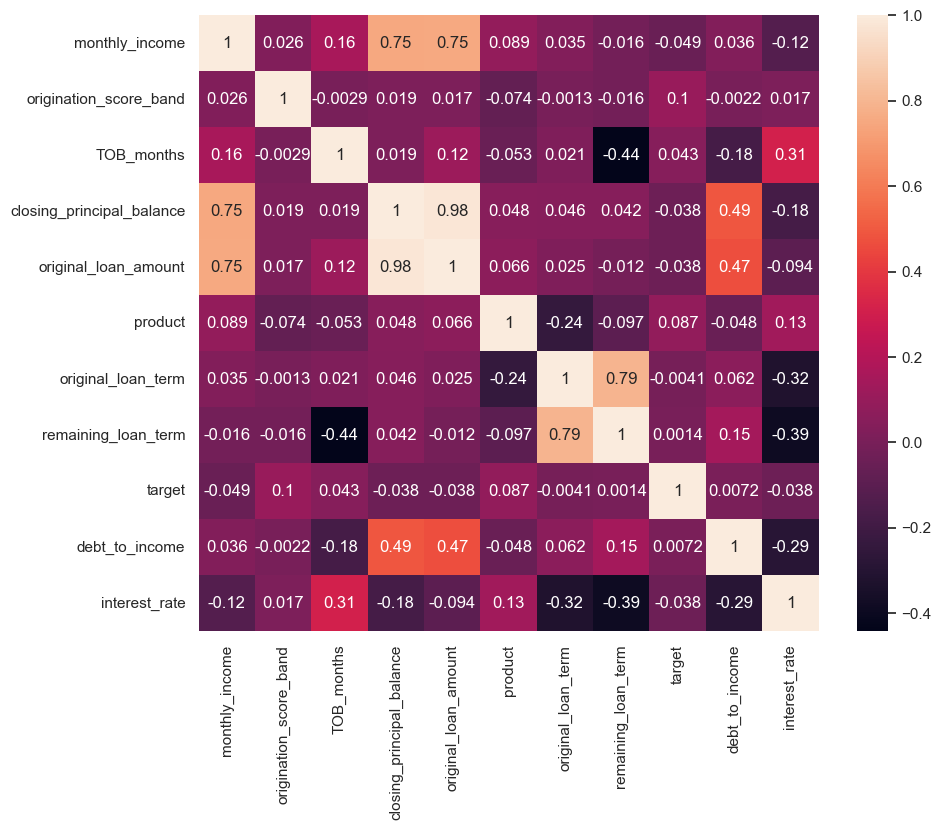

In [34]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
#Scatter plot

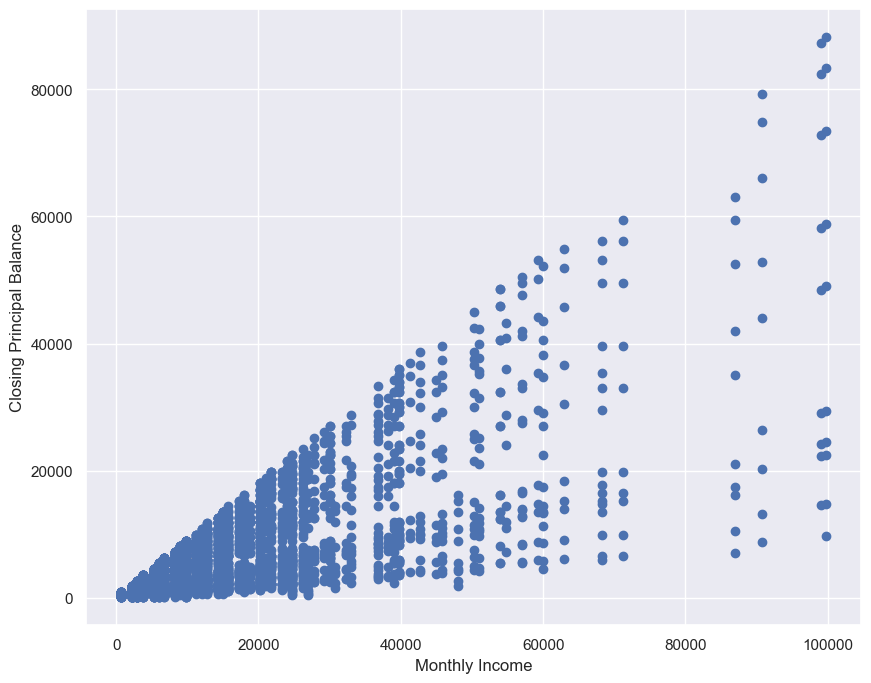

In [36]:
plt.scatter(df['monthly_income'], df['closing_principal_balance'])
plt.xlabel('Monthly Income')
plt.ylabel('Closing Principal Balance');

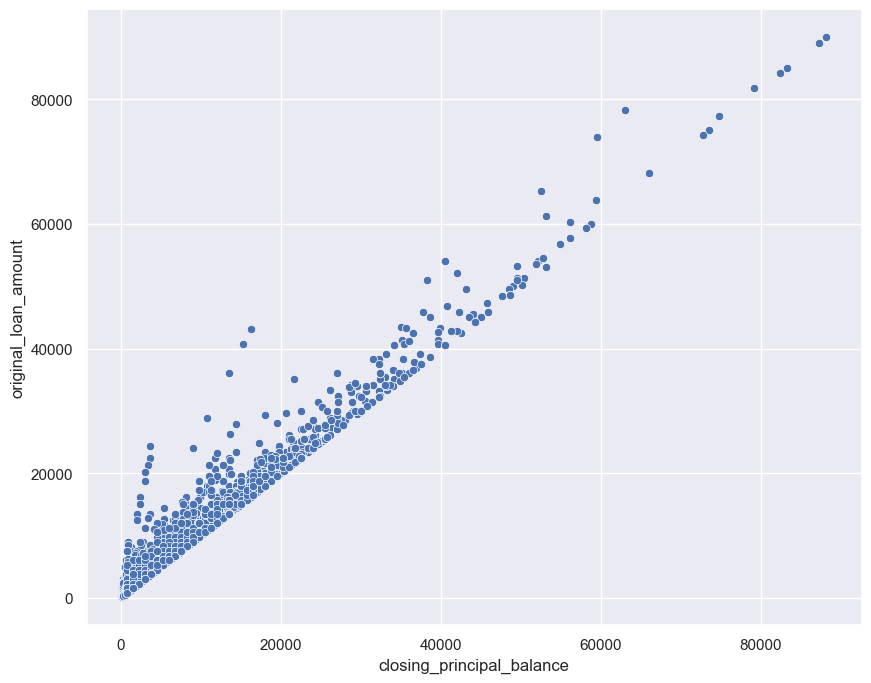

In [37]:
sns.scatterplot(x="closing_principal_balance", y="original_loan_amount", data=df);

In [38]:
#boxplot

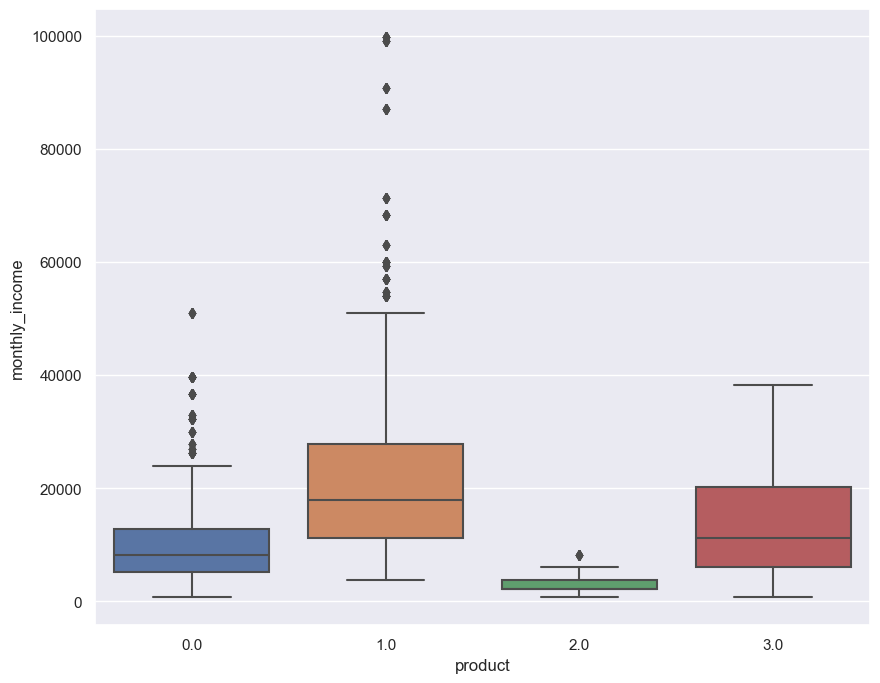

In [39]:
sns.boxplot(x = "product", y = "monthly_income", data = df);

In [40]:
#Histogram

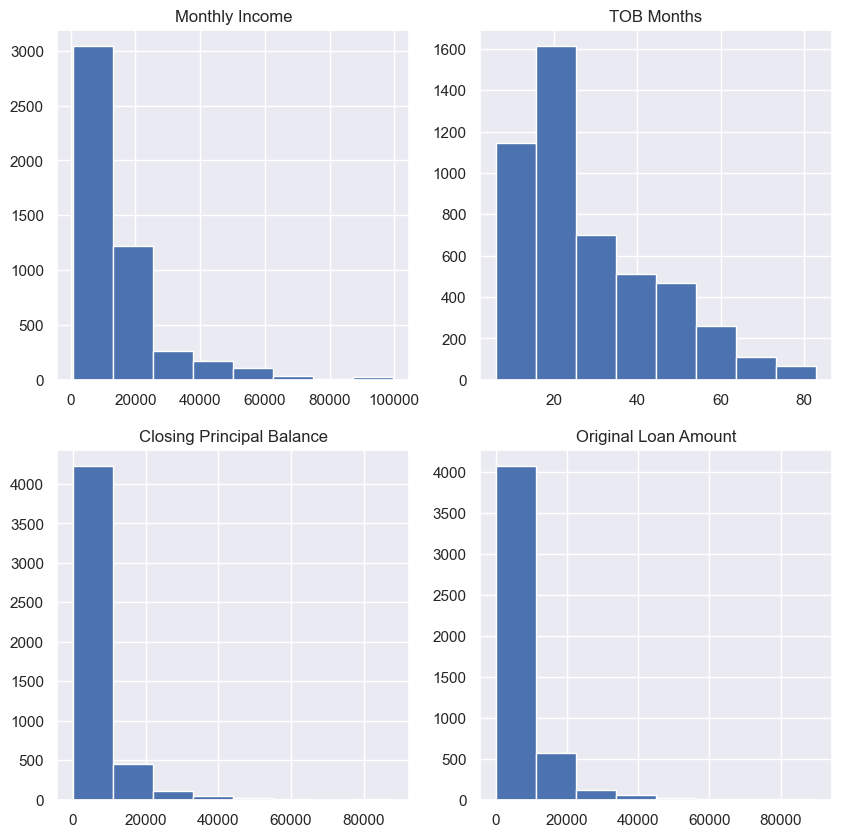

In [41]:
# create a figure and set the size
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# plot histogram for 'monthly_income'
axs[0, 0].hist(df['monthly_income'], bins = 8)
axs[0, 0].set_title('Monthly Income')

# plot histogram for 'TOB_months'
axs[0, 1].hist(df['TOB_months'], bins = 8)
axs[0, 1].set_title('TOB Months')

# plot histogram for 'closing_principal_balance'
axs[1, 0].hist(df['closing_principal_balance'], bins = 8)
axs[1, 0].set_title('Closing Principal Balance')

# plot histogram for 'original_loan_amount'
axs[1, 1].hist(df['original_loan_amount'], bins = 8)
axs[1, 1].set_title('Original Loan Amount');

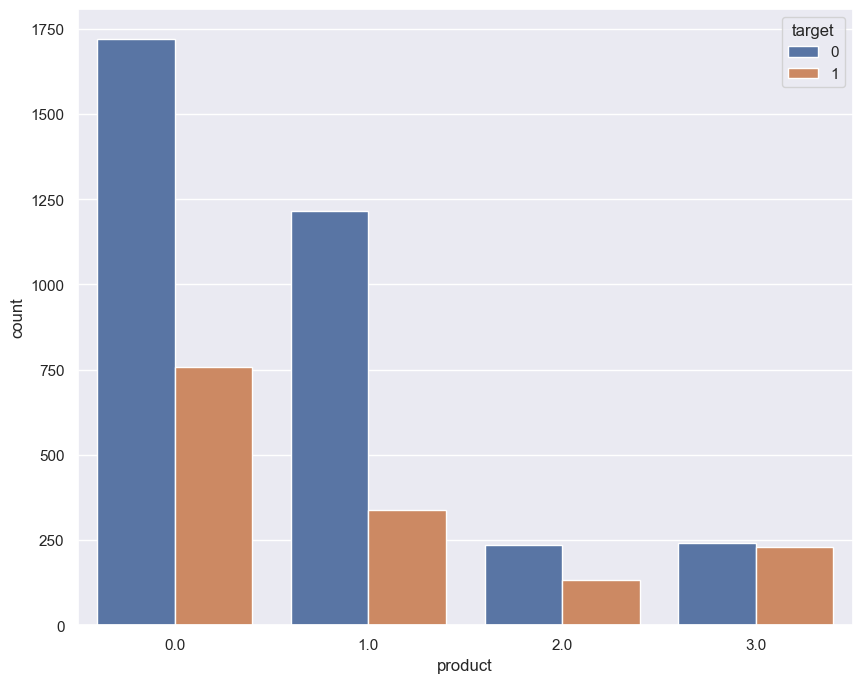

In [42]:
sns.countplot(x='product', hue='target', data=df);

## 5.0 Logistics Regression Classification Model

### 5.1 Defining Independent and Dependent features

In [43]:
X = df[['origination_score_band', 'original_loan_amount', 'monthly_income', 'closing_principal_balance', 'original_loan_term', 'TOB_months', 'product', 'interest_rate', 'remaining_loan_term']].values
X = X.reshape(-1,9)

y = df[['target']].values

In [44]:
y = np.ravel(y)

### 5.2 Splitting Data into Training and Test

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=190)

In [46]:
# Train Logistic Regression on the training data
model = LogisticRegression(C=1.0, penalty='l2', max_iter=200)

In [47]:
# Fit the model to the training data (Logistic Regression)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [48]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = (y_pred == y_test).mean() * 100
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 72.78


In [49]:
model.score(X_train, y_train) * 100

69.84548527281507

In [50]:
# Calculate the accuracy of the model (Logistic Regression)
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

72.77701778385773

In [51]:
# Calculate the precision of the model
precision = precision_score(y_test, y_pred) *100
precision

80.0

In [52]:
# Calculate the recall of the model
recall = recall_score(y_test, y_pred)
recall

0.019801980198019802

In [53]:
#[True Positive], [False Positive]
#[False Negative], [True Negative]

confusion_matrix(y_test,y_pred)

array([[528,   1],
       [198,   4]], dtype=int64)

In [54]:
# Perform prediction, and checking prediction performance

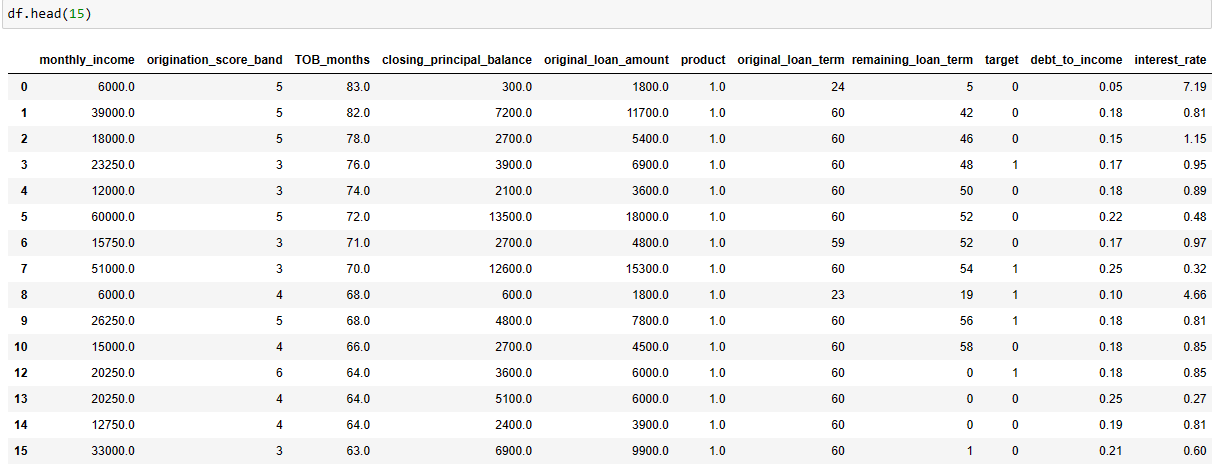

In [55]:
monthly_income = 23250
origination_score_band = 3
TOB_months = 76
closing_principal_balance = 3900
original_loan_amount =6900
product = 1
original_loan_term = 60
remaining_loan_term = 48
interest_rate = 0.95



prediction = model.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")

 TARGET 0: YOUR LOAN IS NOT ROLLED


In [56]:
monthly_income = 6000
origination_score_band = 5
TOB_months = 83
closing_principal_balance = 300
original_loan_amount = 1800
product = 1
original_loan_term = 24
remaining_loan_term = 5
interest_rate = 7.19


prediction = model.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")

 TARGET 1: YOUR LOAN IS ROLLED


In [57]:
monthly_income = int(input('Enter Monthly Income: '))

while True:
    origination_score_band = int(input('Enter Origination Score Band between 1 and 8: '))
    if origination_score_band < 1 or origination_score_band > 8:
        print("Error: Origination Score Band must be between 1 and 8. Please try again.")
    else:
        break

TOB_months = int(input('Enter TOB Month (Early Deliquency Month): '))
closing_principal_balance = int(input('Enter Closing Principal Balance: '))
original_loan_amount = int(input('Enter Original Loan Amount: '))

while True:
    product = int(input('Enter Product between 0 and 3: '))
    if product < 0 or product > 3:
        print("Error: Product must be between 0 and 3. Please try again.")
    else:
        break

original_loan_term = int(input('Enter Original Loan Term: '))
remaining_loan_term = int(input('Enter Remaining Loan Term: '))
interest_rate = float(input('Enter Interest Rate: '))

prediction = model.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")

Enter Monthly Income: 6000
Enter Origination Score Band between 1 and 8: 5
Enter TOB Month (Early Deliquency Month): 83
Enter Closing Principal Balance: 300
Enter Original Loan Amount: 1800
Enter Product between 0 and 3: 1
Enter Original Loan Term: 24
Enter Remaining Loan Term: 5
Enter Interest Rate: 7.19
 TARGET 1: YOUR LOAN IS ROLLED


In [58]:
#Logistic Regression model ends...

## 6.0 Random Forest Classification Model

### 6.1 Defining Independent and Dependent features

In [59]:
X = df[['origination_score_band', 'original_loan_amount', 'monthly_income', 'closing_principal_balance', 'original_loan_term', 'TOB_months', 'product', 'interest_rate', 'remaining_loan_term']].values
X = X.reshape(-1,9)

y = df[['target']].values

In [60]:
#Make sure y variable is a 1-D array for 
y = np.ravel(y)

### 6.2 Splitting Data into Training and Test

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=200, random_state=100)
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
predictions = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = (predictions == y_test).mean() * 100
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 100.00


In [63]:
# Calculate the accuracy of the model (Random forest)
accuracy = accuracy_score(y_test, predictions)*100
accuracy

100.0

In [64]:
clf.score(X_train, y_train) *100

100.0

In [65]:
# Calculate the precision of the model (Random forest)
precision = precision_score(y_test, predictions)*100
precision

100.0

In [66]:
# Calculate the recall of the model (Random forest)
recall = recall_score(y_test, predictions)*100
recall

100.0

In [67]:
#[True Positive], [False Positive]
#[False Negative], [True Negative]

#Confusion matrix result of the model (Random forest)
confusion_matrix(y_test,predictions)

array([[841,   0],
       [  0, 378]], dtype=int64)

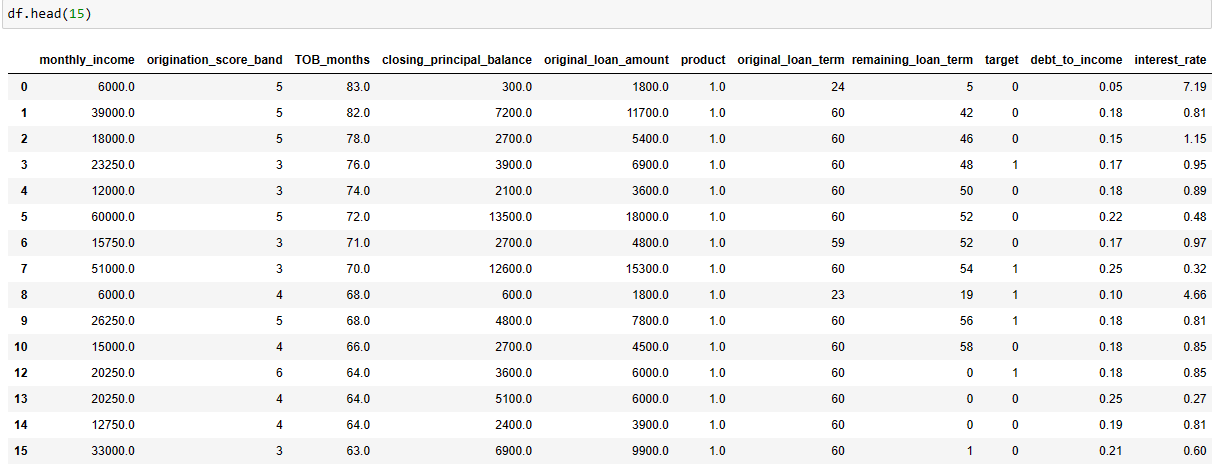

In [68]:
monthly_income = 23250
origination_score_band = 3
TOB_months = 76
closing_principal_balance = 3900
original_loan_amount =6900
product = 1
original_loan_term = 60
remaining_loan_term = 48
interest_rate = 0.95



prediction = clf.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")

 TARGET 1: YOUR LOAN IS ROLLED


In [69]:
monthly_income = 6000
origination_score_band = 5
TOB_months = 83
closing_principal_balance = 300
original_loan_amount = 1800
product = 1
original_loan_term = 24
remaining_loan_term = 5
interest_rate = 7.19


prediction = clf.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")

 TARGET 0: YOUR LOAN IS NOT ROLLED


In [70]:
monthly_income = int(input('Enter Monthly Income: '))

while True:
    origination_score_band = int(input('Enter Origination Score Band between 1 and 8: '))
    if origination_score_band < 1 or origination_score_band > 8:
        print("Error: Origination Score Band must be between 1 and 8. Please try again.")
    else:
        break

TOB_months = int(input('Enter TOB Month (Early Deliquency Month): '))
closing_principal_balance = int(input('Enter Closing Principal Balance: '))
original_loan_amount = int(input('Enter Original Loan Amount: '))

while True:
    product = int(input('Enter Product between 0 and 3: '))
    if product < 0 or product > 3:
        print("Error: Product must be between 0 and 3. Please try again.")
    else:
        break

original_loan_term = int(input('Enter Original Loan Term: '))
remaining_loan_term = int(input('Enter Remaining Loan Term: '))
interest_rate = float(input('Enter Interest Rate: '))

prediction = clf.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")

Enter Monthly Income: 6000
Enter Origination Score Band between 1 and 8: 5
Enter TOB Month (Early Deliquency Month): 83
Enter Closing Principal Balance: 300
Enter Original Loan Amount: 1800
Enter Product between 0 and 3: 1
Enter Original Loan Term: 24
Enter Remaining Loan Term: 5
Enter Interest Rate: 7.19
 TARGET 0: YOUR LOAN IS NOT ROLLED


In [71]:
#Random Forest Classification model ends...

## 7.0 XGBoost (eXtreme Gradient Boosting) 

### 7.1 Defining Independent and Dependent features

In [72]:
X = df[['origination_score_band', 'original_loan_amount', 'monthly_income', 'closing_principal_balance', 'original_loan_term', 'TOB_months', 'product', 'interest_rate', 'remaining_loan_term']].values
X = X.reshape(-1,9)

y = df[['target']].values

In [73]:
#Make sure y variable is a 1-D array for 
y = np.ravel(y)

In [74]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Create the XGBoost model
xg_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [76]:
# Fit the model to the training data
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [77]:
xg_model.score(X_train, y_train)*100

100.0

In [78]:
# Make predictions on the test set
xg_pred = xg_model.predict(X_test)

In [79]:
# Print the accuracy of the model
print("Accuracy: {:.2f}%".format(xg_model.score(X_test, y_test) * 100))

Accuracy: 100.00%


In [80]:
# Calculate the accuracy of the model (XGBoost)
accuracy = accuracy_score(y_test, xg_pred)*100
accuracy

100.0

In [81]:
# Calculate the recall of the model (XGBoost)
recall = recall_score(y_test, xg_pred)*100
recall

100.0

In [82]:
# Calculate the precision of the model (XGBoost)
precision = precision_score(y_test, xg_pred)*100
precision

100.0

In [83]:
#[True Positive], [False Positive]
#[False Negative], [True Negative]

#Confusion matrix result of the model (XGBoost)
confusion_matrix(y_test,xg_pred)

array([[668,   0],
       [  0, 307]], dtype=int64)

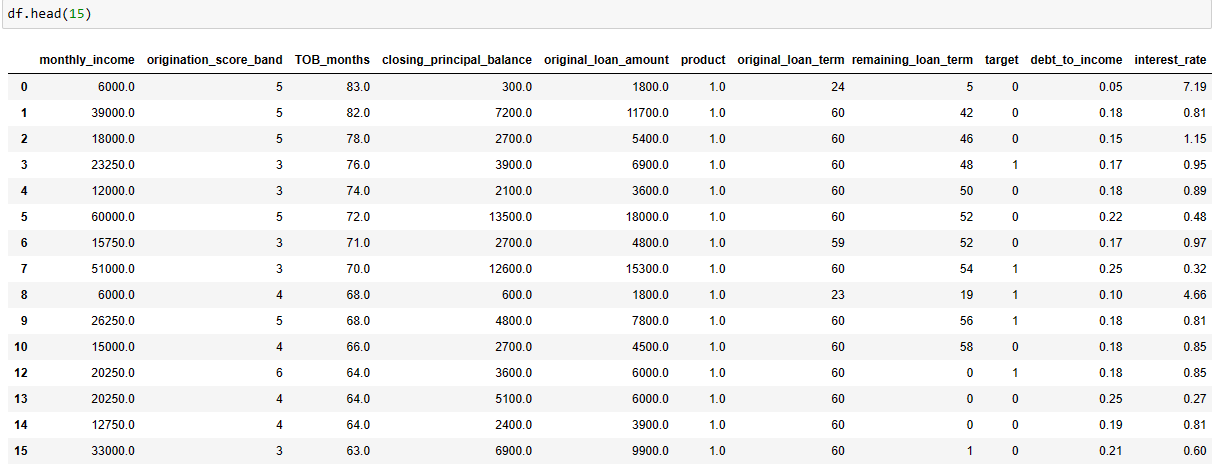

In [84]:
monthly_income = 23250
origination_score_band = 3
TOB_months = 76
closing_principal_balance = 3900
original_loan_amount =6900
product = 1
original_loan_term = 60
remaining_loan_term = 48
interest_rate = 0.95



prediction = xg_model.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")

 TARGET 1: YOUR LOAN IS ROLLED


In [85]:
monthly_income = 6000
origination_score_band = 5
TOB_months = 83
closing_principal_balance = 300
original_loan_amount = 1800
product = 1
original_loan_term = 24
remaining_loan_term = 5
interest_rate = 7.19


prediction = xg_model.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")

 TARGET 0: YOUR LOAN IS NOT ROLLED


In [86]:
monthly_income = int(input('Enter Monthly Income: '))

while True:
    origination_score_band = int(input('Enter Origination Score Band between 1 and 8: '))
    if origination_score_band < 1 or origination_score_band > 8:
        print("Error: Origination Score Band must be between 1 and 8. Please try again.")
    else:
        break

TOB_months = int(input('Enter TOB Month (Early Deliquency Month): '))
closing_principal_balance = int(input('Enter Closing Principal Balance: '))
original_loan_amount = int(input('Enter Original Loan Amount: '))

while True:
    product = int(input('Enter Product between 0 and 3: '))
    if product < 0 or product > 3:
        print("Error: Product must be between 0 and 3. Please try again.")
    else:
        break

original_loan_term = int(input('Enter Original Loan Term: '))
remaining_loan_term = int(input('Enter Remaining Loan Term: '))
interest_rate = float(input('Enter Interest Rate: '))

prediction = xg_model.predict([(origination_score_band, original_loan_amount, monthly_income, closing_principal_balance, original_loan_term, TOB_months, product, interest_rate, remaining_loan_term)])
if prediction == 1:
    print(Fore.RED, Style.BRIGHT + "TARGET 1: YOUR LOAN IS ROLLED")
else:
    print(Fore.GREEN, Style.BRIGHT + "TARGET 0: YOUR LOAN IS NOT ROLLED")


Enter Monthly Income: 6000
Enter Origination Score Band between 1 and 8: 5
Enter TOB Month (Early Deliquency Month): 83
Enter Closing Principal Balance: 300
Enter Original Loan Amount: 1800
Enter Product between 0 and 3: 1
Enter Original Loan Term: 24
Enter Remaining Loan Term: 5
Enter Interest Rate: 7.19
 TARGET 0: YOUR LOAN IS NOT ROLLED


In [87]:
#XGBoost Classification model ends...

### The  below  observations  were  recorded  after carrying  out  further  test  on  my Random forest  and  XGBoost model

I took out the product field from my model;

Random forest
Accuracy score: 99.75
Precision score: 100
Confusion matrix: (TP: 841 TN: 0, FN: 3, FP: 375)

XGBoost
Accuracy score: 100
Precision score: 100
Confusion matrix: (TP: 668 TN: 0, FN: 0, FP: 307)

I took out the interest rate field from my model;

Random forest
Accuracy score: 98.20
Precision score: 94.44
Confusion matrix: (TP: 839 TN: 2, FN: 20, FP: 358)

XGBoost
Accuracy score: 99.38
Precision score: 100
Confusion matrix: (TP: 668 TN: 0, FN: 6, FP: 301)